In [80]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

# Import functions to read image files
from matplotlib import image as mpimg

# Import functions from skimage to analyse sizes
import skimage.measure

In [40]:
# Read N images and take an average
N = 100
for i in range(1, N+1):
    # Use f-string to insert the number into the string
    # giving the filename
    # https://docs.python.org/3/tutorial/inputoutput.html#tut-f-strings
    filename = f'VimbaImage_New_{i}.bmp'
    # Create an array from the first image
    if i == 1:
        # Read the image, and use astype() to convert
        # from 8-bit unsigned int to 64-bit float
        background = mpimg.imread(filename).astype(np.float64)
    else:
        # When reading all images after the first,
        # just add to the existing array
        background += mpimg.imread(filename)
    
# and finally divide by N to get average
background = background / N

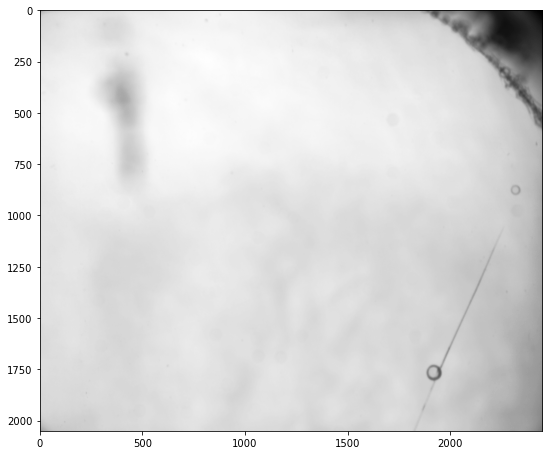

In [45]:
# Show the average background image, using a greyscale colourmap
fig = plt.figure(figsize=(9,9))
plt.imshow(background, cmap=plt.cm.Greys_r)

In [46]:
# Load a new image, and convert to 64-bit float
img = mpimg.imread(f'VimbaImage_New_389.bmp').astype(np.float64)

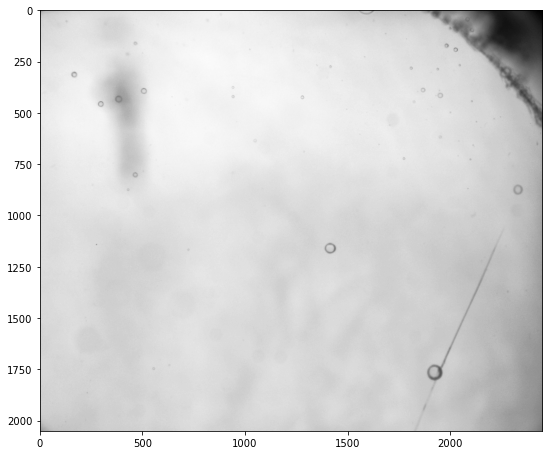

In [48]:
# Show the new image, using a greyscale colourmap
fig = plt.figure(figsize=(9,9))
plt.imshow(img, cmap=plt.cm.Greys_r)

# Compare subtraction and division as ways to remove background

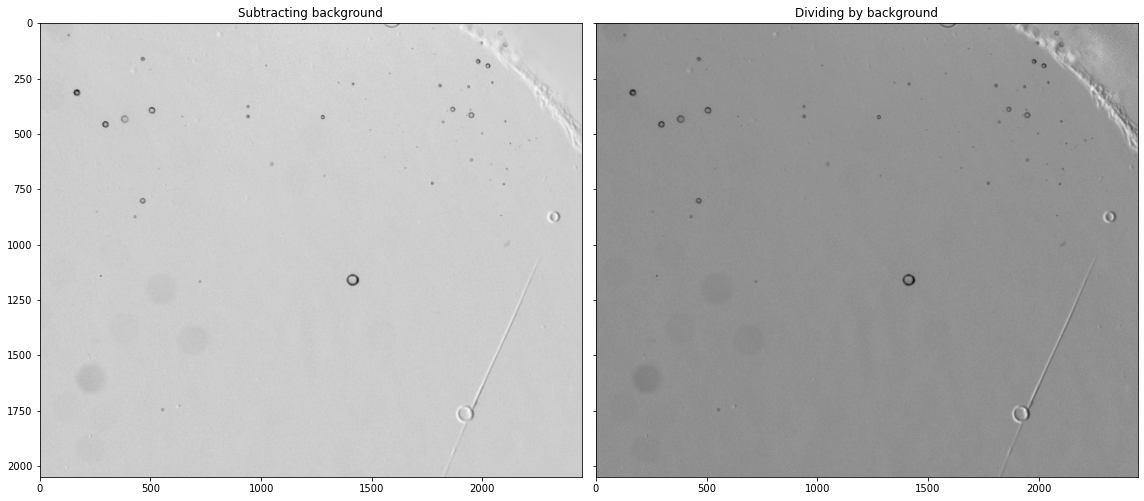

In [138]:
# Show the new image, with average background subtracted
fig, ax = plt.subplots(ncols=2, figsize=(16, 8), sharey=True)

# Subtracting background
subtracted = img - background
ax[0].imshow(subtracted, cmap=plt.cm.Greys_r)

# Dividing by background
divided = img / background
ax[1].imshow(divided, cmap=plt.cm.Greys_r)

ax[0].set_title('Subtracting background')
ax[1].set_title('Dividing by background')

plt.tight_layout()

# Apply a threshold to make the image binary

## (black for bubbles, white everywhere else)

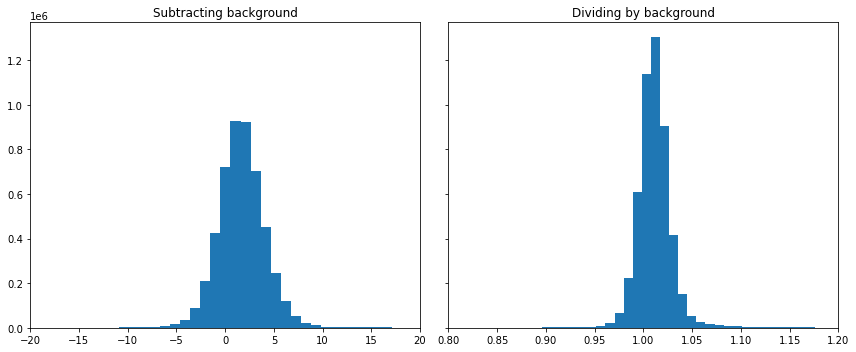

In [136]:
# To examine the choice of threshold, it can be useful to plot
# a histogram of pixel values.
# The idea is that we want only the dark pixels representing bubbles
# to show up in the processed image.

# Plot histograms of pixel values
fig, ax = plt.subplots(ncols=2, figsize=(12, 5), sharey=True)
ax[0].hist((subtracted).flatten(), bins=100)
ax[1].hist((divided).flatten(), bins=100)

# Setting range of x-axis to see more clearly
ax[0].set_xlim(-20, 20)
ax[1].set_xlim(0.8, 1.2)

ax[0].set_title('Subtracting background')
ax[1].set_title('Dividing by background')

plt.tight_layout()

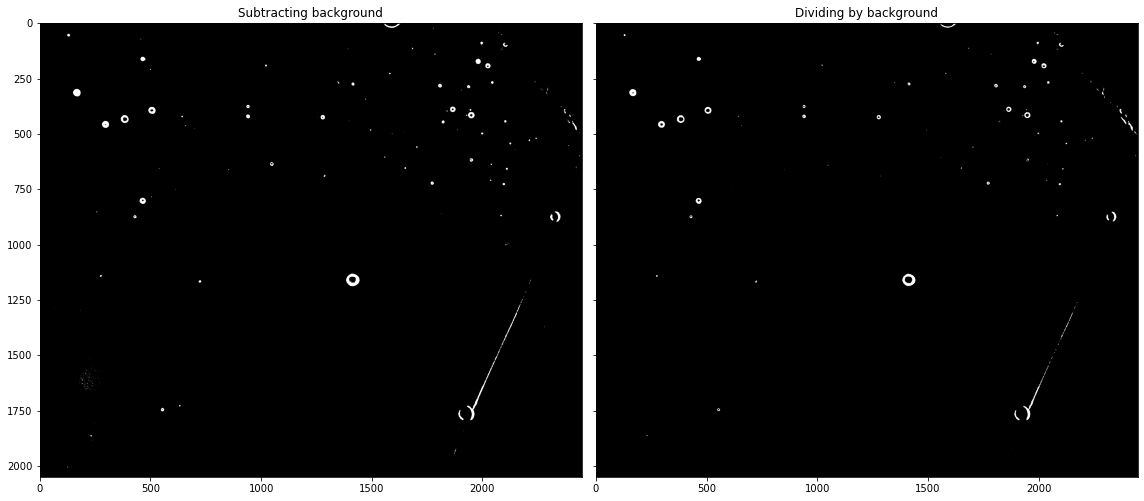

In [139]:
# Show the new image, with average background subtracted
# and with some threshold applied to make image binary
fig, ax = plt.subplots(ncols=2, figsize=(16, 8), sharey=True)

# Based on the histogram above, trying threshold of -10 for subtracted image
# Setting all pixels darker than -10 to True, all others to False
subtracted_binary = subtracted < -10
ax[0].imshow(subtracted_binary, cmap=plt.cm.Greys_r)

# Based on the histogram above, trying threshold of 0.9 for divided image
# Setting all pixels darker than 0.9 to True, all others to False
divided_binary = divided < 0.9
ax[1].imshow(divided_binary, cmap=plt.cm.Greys_r)

ax[0].set_title('Subtracting background')
ax[1].set_title('Dividing by background')

plt.tight_layout()

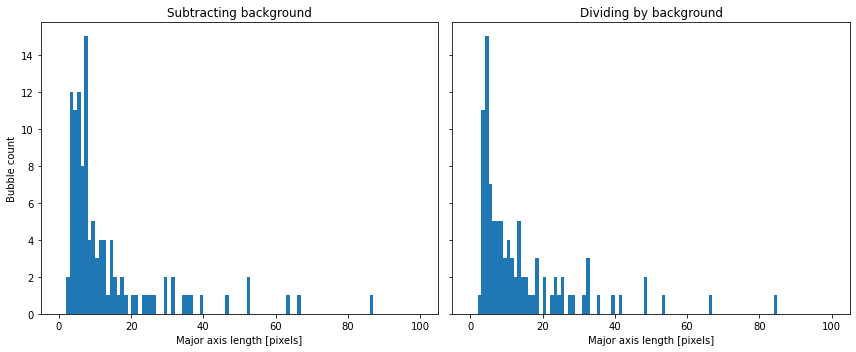

In [140]:
fig, ax = plt.subplots(ncols=2, figsize=(12,5), sharex=True, sharey=True)

# Use function from skimage to label all groups of white pixels
labeled = skimage.measure.label(subtracted_binary)
# And then calculate statistics of those groups
stats = skimage.measure.regionprops(labeled)
# And finally make array of major axis values
# including only bubbles larger than 5 pixels
major_axes = np.array([s.major_axis_length for s in stats if s.convex_area > 4])
# Plot histogram of axis lengths for this image
ax[0].hist(major_axes, bins=np.linspace(0, 100, 101))
ax[0].set_ylabel('Bubble count')
ax[0].set_xlabel('Major axis length [pixels]')

# Use function from skimage to label all groups of white pixels
labeled = skimage.measure.label(divided_binary)
# And then calculate statistics of those groups
stats = skimage.measure.regionprops(labeled)
# And finally make array of major axis values
# including only bubbles larger than 5 pixels
major_axes = np.array([s.major_axis_length for s in stats if s.convex_area > 4])
# Plot histogram of axis lengths for this image
ax[1].hist(major_axes, bins=np.linspace(0, 100, 101))
ax[1].set_xlabel('Major axis length [pixels]')

ax[0].set_title('Subtracting background')
ax[1].set_title('Dividing by background')

plt.tight_layout()